In [3]:
import pandas as pd
from transformers import AutoTokenizer, DistilBertForSequenceClassification
import torch

def predict(model, file):
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased")

    # Load the dataset
    df = pd.read_csv(file)

    # Create an empty list to store the predicted labels
    predicted_labels = []

    # Iterate over each row and make predictions
    for _, row in df.iterrows():
        # Tokenize the text in the current row
        inputs = tokenizer(row['Text'], padding=True, truncation=True, max_length=128, return_tensors="pt")

        # Make predictions on the tokenized input
        outputs = model(**inputs)
        predicted_label = torch.argmax(outputs.logits, dim=1)

        # Map the predicted label to "ARG" or "ES#"
        if predicted_label.item() == 0:
            predicted_label = "ARG"
        else:
            predicted_label = "ES"

        # Append the predicted label to the list
        predicted_labels.append(predicted_label)
        print(predicted_label)

    # Add the predicted labels to the DataFrame
    df['Predict'] = predicted_labels

    # Save the new DataFrame as a .csv file
    new_file = f'predicted_updated_{file}'
    df.to_csv(new_file, index=False)

    # Print the number of sentences predicted
    num_sentences = len(predicted_labels)
    print(f"Predicted labels for {num_sentences} sentences. Saved as {new_file}.")



In [4]:
predict(DistilBertForSequenceClassification.from_pretrained("./new_stuff_tested/checkpoint-500")
        ,'predicted_tweets_test_formal_preprocessed.csv')

ARG
ES
ARG
ARG
ES
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ES
ES
ARG
ES
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ES
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ES
ES
ES
ES
ES
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ES
ARG
ES
ARG
ES
ES
ES
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ES
ES
ES
ES
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ES
ES
ES
ARG
ARG
ARG
ARG
ES
ES
ES
ARG
ARG
ARG
ARG
ARG


In [5]:
predict(DistilBertForSequenceClassification.from_pretrained("./new_stuff_tested/checkpoint-500")
        ,'predicted_tweets_test_informal_preprocessed.csv')

ES
ARG
ES
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ES
ARG
ARG
ES
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ES
ARG
ARG
ARG
ES
ES
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ES
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ARG
ES
ARG
ES
ARG
ES
ARG
ARG
ES
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ES
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
A

# DistilBERT NO NER

In [56]:
predict(DistilBertForSequenceClassification.from_pretrained("./new_stuff_NO_NER/checkpoint-2500")
        ,'tweets_test_formal_preprocessed.csv')

ARG
ES
ARG
ARG
ES
ES
ARG
ARG
ES
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ARG
ARG
ARG
ES
ARG
ARG
ES
ARG
ES
ES
ARG
ES
ARG
ES
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ARG
ARG
ARG
ARG
ARG
ARG
ES
ES
ARG
ES
ES
ARG
ARG
ARG
ARG
ARG
ES
ARG
ES
ARG
ARG
ARG
AR

In [16]:
predict(DistilBertForSequenceClassification.from_pretrained("./new_stuff_NO_NER/checkpoint-2500")
        ,'tweets_test_informal_preprocessed.csv')

ES
ES
ARG
ARG
ARG
ES
ES
ARG
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ARG
ES
ARG
ES
ARG
ARG
ES
ARG
ES
ARG
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ARG
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ARG
ARG
ES
ES
ARG
ES
ARG
ARG
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ARG
ES
ARG
ARG
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ARG
ES
ARG
ES
ARG
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ARG
ARG
ARG
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ARG
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ARG
ARG
ES
ES
ARG
ES
ARG
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ARG
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ES
ARG
ES
ES
ES
ES
ES
ARG
ES
ES

# Results

In [2]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_evaluation_metrics(dataset):
    predictions = dataset['Predict']
    labels = dataset['Label']

    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Formal with NE

In [4]:
# Load the dataset from the CSV file
dataset = pd.read_csv("predicted_NO_NE_predicted_tweets_test_formal_preprocessed.csv")

# Call the function with the loaded dataset
calculate_evaluation_metrics(dataset)

Precision: 0.8773592930174273
Recall: 0.8527918781725888
F1 Score: 0.8519760944710304


# informal with NE

In [6]:
# Load the dataset from the CSV file
dataset = pd.read_csv("predicted_tweets_test_informal_preprocessed.csv")
# Call the function with the loaded dataset
calculate_evaluation_metrics(dataset)

Precision: 0.737993462698809
Recall: 0.734
F1 Score: 0.7352918796097855


# Formal without NE

In [8]:
# Load the dataset from the CSV file
dataset = pd.read_csv("predicted_tweets_test_formal_preprocessed.csv")
# Call the function with the loaded dataset
calculate_evaluation_metrics(dataset)

Precision: 0.8833581874384049
Recall: 0.8592524227041993
F1 Score: 0.8585156908896935


# Informal without NE

In [5]:
# Load the dataset from the CSV file
dataset = pd.read_csv("predicted_NO_NE_tweets_test_informal_preprocessed.csv")
# Call the function with the loaded dataset
calculate_evaluation_metrics(dataset)

Precision: 0.7829322390151137
Recall: 0.77
F1 Score: 0.7719169167802167


# Visualization

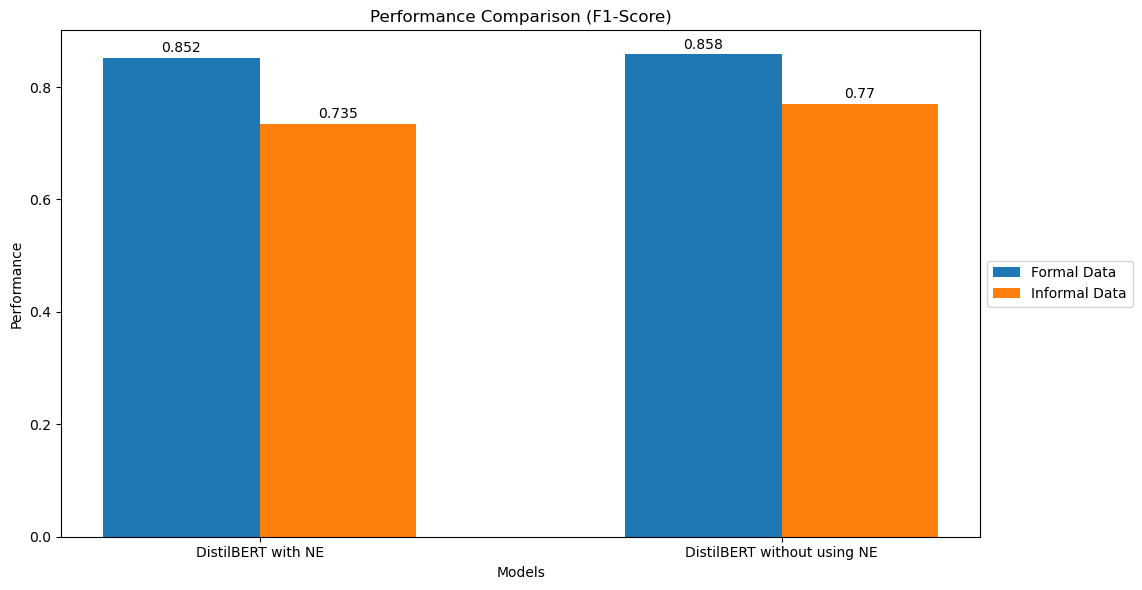

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the performance values
distilbert_with_ne_formal = 0.852
distilbert_with_ne_informal = 0.735

distilbert_without_ne_formal = 0.858
distilbert_without_ne_informal = 0.77

# Set the x-axis labels
x_labels = ['DistilBERT with NE', 'DistilBERT without using NE']

# Set the width of each column
width = 0.3

# Set the positions of the x-axis ticks
positions = np.arange(len(x_labels))

# Create a figure and axes with a larger size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the column chart for formal data
ax.bar(positions - width/2, [distilbert_with_ne_formal, distilbert_without_ne_formal], width, label='Formal Data')

# Plot the column chart for informal data
ax.bar(positions + width/2, [distilbert_with_ne_informal, distilbert_without_ne_informal], width, label='Informal Data')

# Display the actual performance values on top of each bar
for i, value in enumerate([distilbert_with_ne_formal, distilbert_without_ne_formal]):
    ax.text(i - width/2, value + 0.01, str(value), ha='center')
for i, value in enumerate([distilbert_with_ne_informal, distilbert_without_ne_informal]):
    ax.text(i + width/2, value + 0.01, str(value), ha='center')

# Set the title and labels
ax.set_title('Performance Comparison (F1-Score)')
ax.set_xlabel('Models')
ax.set_ylabel('Performance')

# Set the x-axis tick labels
ax.set_xticks(positions)
ax.set_xticklabels(x_labels)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()

# Add a legend outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()
